**Understanding and Predicting Malignancy in Breast Cancer**

Authors: Shaotai (Max) Hu and Shravya Tathineni


---

**Introduction**

Cancer has been an unstoppable force plaguing our society for centuries. For the past 100 years technological advancements have allowed us to kill cancer cells more effectively, and, in many cases, eradicate the cancer cells present in the body. In the hopes of learning more about cancer and applying our data sciences skills to the real world, our group will be conducting a detailed study regarding cancer, specifically breast cancer tumors.
It must first be acknowledged that cancer in itself is a broad topic, and thus we must narrow our focus down to a certain cancer. Today, one of the most common cancers found among women around the world is breast cancer, and so we that is what we will be focusing on. Breast cancer usually comes in the form of a tumor, and the tumors fall into two categories, malignant or benign. Malignant tumors grow faster than benign tumors and can invade other parts of the body. They are also usually more likely to be life threatening than benign tumors. We will be asking, and answering the question "Can we predict whether tumors are malignant or benign based on tumor breast cell characteristics?" The specific characteristics we will be looking at are radius, texture, perimeter, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. We will not be using the original breast tumor data set as it is nearly 10 years old, and has not been updated. Instead, we will be using an annually updated version of the original data, that has been scored by Kaggle to have 100% in completeness, credibility, and compatibility.


---

**Methodology**

*Data Preparation*

The dataset was already cleaned and had a 10 score for the usability. We modified the dataset so that diagnosis column changed from benign and malignant to 0 and 1. We also seperated the malignant and benign data into two different data frames. The data set has 32 columns in total. In these 32 columns, the ten main characteristics each have 3 different columns - mean, standard error (se), worst. For the purposes of our project, we only looked at the "mean" of the characteristics. This is due to the mean is a good indication of the average values of benign and malignant tumors. It would make most sense to conduct statistical tests, and training models based on the mean value, and not the standard error and worst values. So, we chose to drop the standard error and worst columns for all of the characteristics.

*Statistics*

We used two sample T-tests and ANOVA tests along with their respective null hypothesis and alternative hypothesis for statistical testing. For instance, our null hypothesis is “The physical characteristics of breast tumors do not help determine if they are benign or malignant”, and our alternative hypothesis is “The physical characteristics of breast tumors do help determine if they are benign or malignant”. With an alpha level of 0.05, If the p-value is less than alpha, we reject the null hypothesis. To conduct the T-tests and ANOVA tests we used the data from the columns perimeter_mean, area_mean, and smoothness_mean.

*Machine Learning*

We used scikit-learn to create random forests which were then used to predict whether the tumor would be malignant or benign based on certain parameters of the tumor. Using random forests was the right decision because they are usually more accurate than individual decision trees as they combine many individual trees and they help prevent overfitting which is important because we do not want our code to work for only our specific dataset. They also, while reducing overfitting, have good accuracy numbers. We decided to experiment with two different parameters, n_estimators and min_samples_leaf. We also decided to experiment with whether reducing the number of features would make a difference. We looked at n_estimators values of 200 and 150 in conjunction with min_samples_leaf values of 5 and 25 to create 4 different machine learning models. We then took the specific features that indicated that they were statistically significant in the statistical analysis and created the same classifiers for them.


Link to data set:
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy import stats
import scipy.stats as sts
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# bcd = breast cancer data
bcd = pd.read_csv("breast-cancer.csv")
bcd.head()

In [ ]:
# removes the "worst" and "standard error" columns
bcd = bcd.iloc[:, :12]
bcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
# turns M (malignant) to 1, turns B (benign) to 0
bcd["diagnosis"] = bcd["diagnosis"].replace("M", 1)
bcd["diagnosis"] = bcd["diagnosis"].replace("B", 0)
bcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
# groups 1 together and 0 together and creates 2 new data frames
grouping = bcd.groupby(bcd.diagnosis)
one_group = grouping.get_group(1)
zero_group = grouping.get_group(0)

In [ ]:
one_group.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
zero_group.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503


In [ ]:
# count of the number of benign and number of malignant breast tumors
bcd['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Visualization

<Axes: xlabel='diagnosis', ylabel='count'>

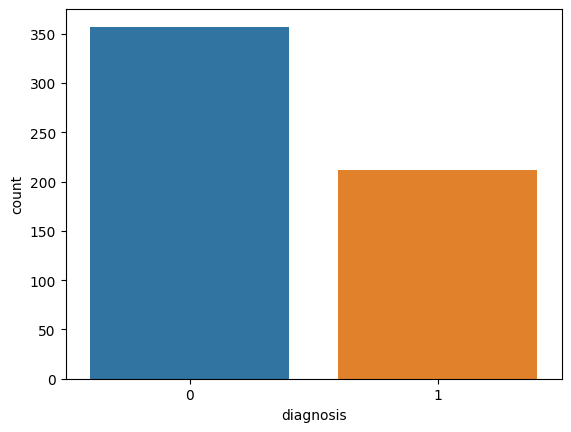

In [ ]:
# bar chart visualizing that there is more benign tumors than malignant tumors
sns.countplot(data = bcd, x = 'diagnosis')

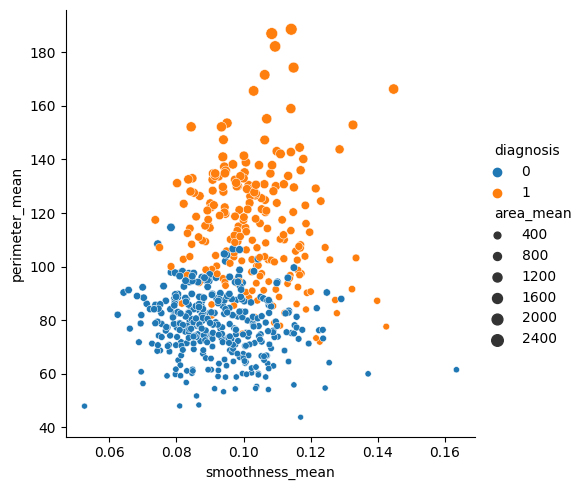

In [ ]:
# plotting a scatter plot using perimeter_mean and smoothness_mean with area mean as the size of dots
sns.relplot(data = bcd, x = "smoothness_mean", y = "perimeter_mean", hue = "diagnosis", size = "area_mean")

In the scatter plot above, we can see that the benign tumors have a larger range of smoothness_mean when compared to malignant tumors.

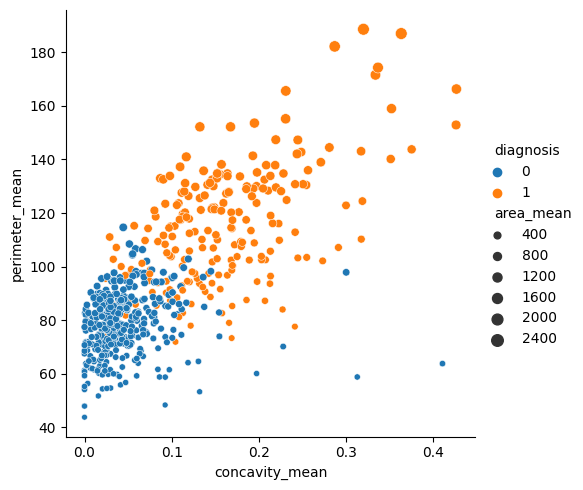

In [ ]:
# plotting a scatter plot using perimeter_mean and concavity_mean with area mean as the size of dots
sns.relplot(data = bcd, x = "concavity_mean", y = "perimeter_mean", hue = "diagnosis", size = "area_mean")

We see the an almost linear relationship between the concavity_mean, and the perimeter_mean. The larger the compactness the greater the area, and perimeter, indicating malignant tumors tend to be bigger.

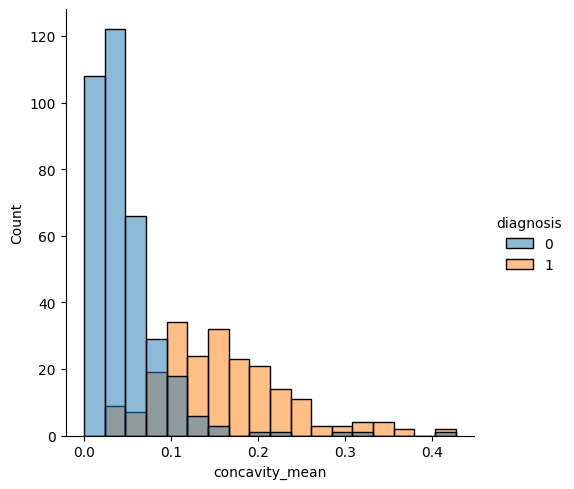

In [ ]:
# histogram of the concavity_mean
sns.displot(bcd, x = "concavity_mean", hue = "diagnosis")

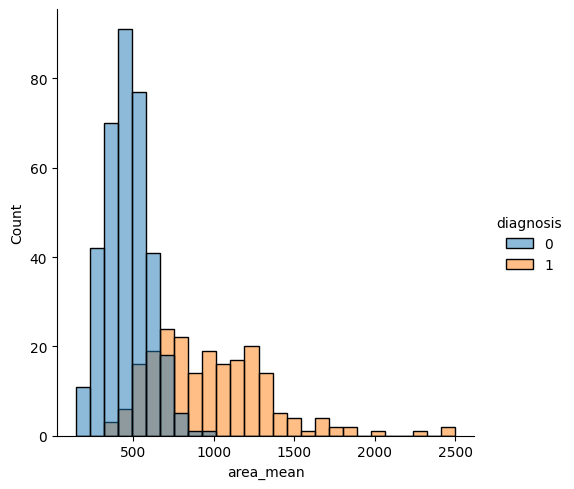

In [ ]:
# histogram of the area_mean
sns.displot(bcd, x = "area_mean", hue = "diagnosis")

Further proves that malignant tumors are bigger.

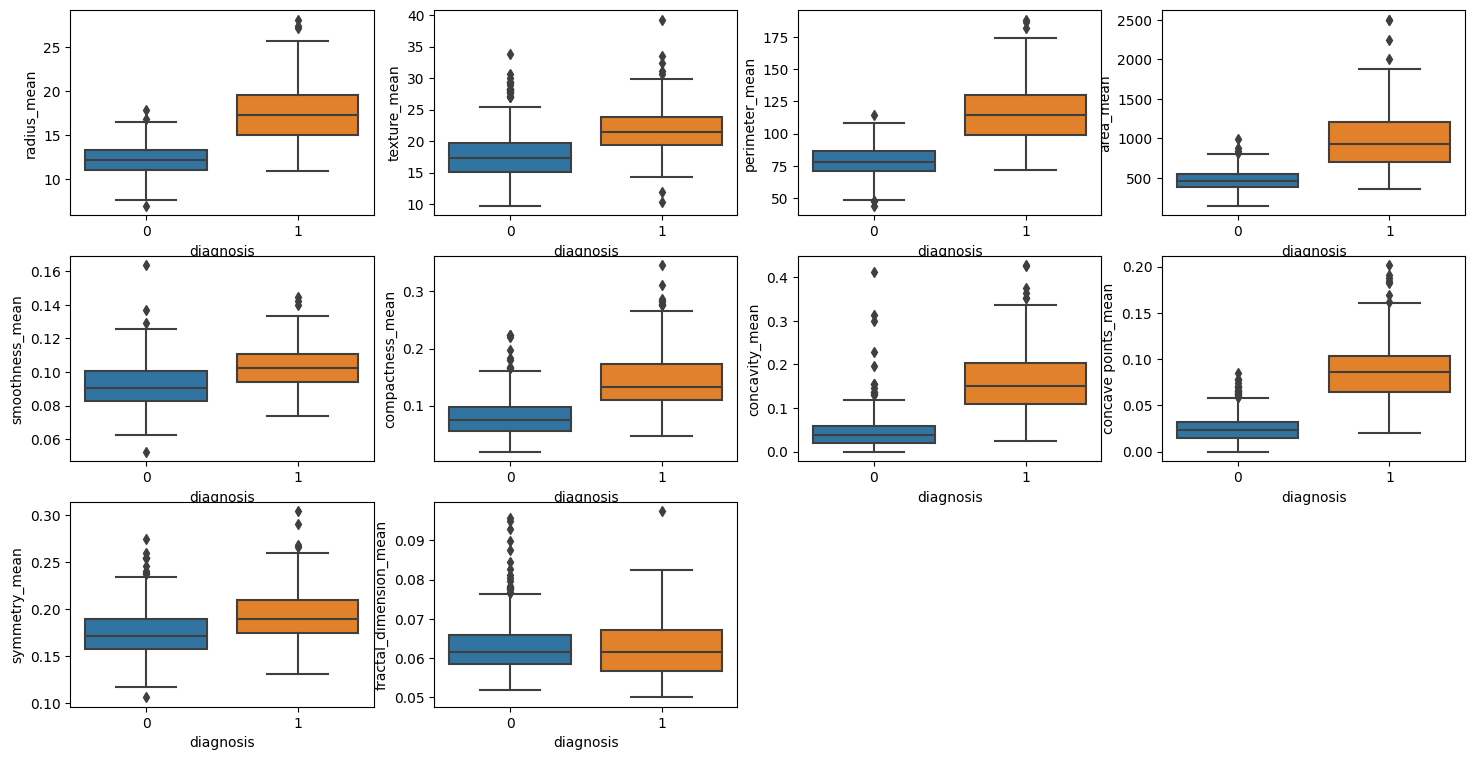

In [ ]:
# boxplots showing the spread of and comparing the characteristic means of benign and malignant tumors
new_bcd = bcd.drop(["id"], axis=1)
var = [col for col in new_bcd.columns if col != 'diagnosis']

fig = plt.figure(figsize = (18,25))
rows = 8
cols = 4

for i, col in enumerate(var):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.boxplot(data = bcd, x = 'diagnosis', y = col, ax = ax)

<Axes: >

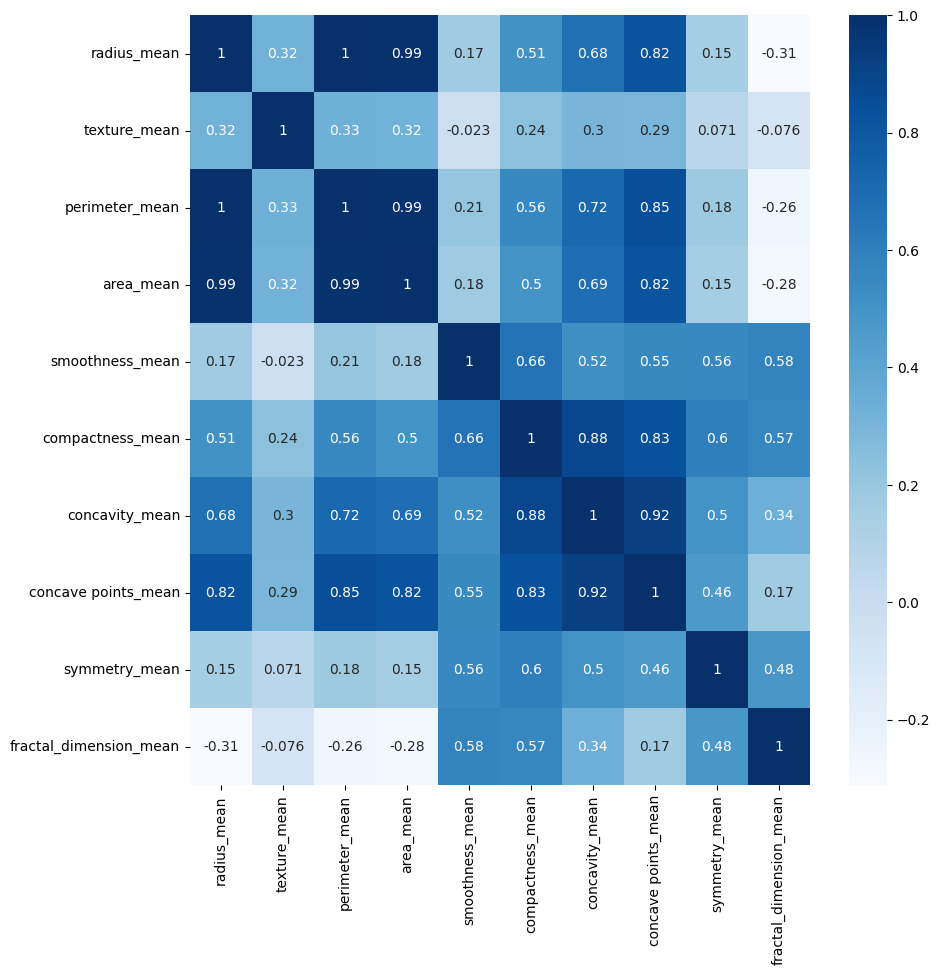

In [ ]:
# heatmap showing correlations between the different tumor characteristics
# darker shades indicate closer correlations
new_bcd_2 = bcd.drop(["id", 'diagnosis'], axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(new_bcd_2.corr(), cbar = True, annot = True, cmap = "Blues")

# Statistics

For the purpose of the statistical test making the most sense, we will be conducting a statistics test that is a variation of a T test, as we are utimately comparing means. Now there are two ways to conduct this statistical test The first method is to use many two sample T tests, and various hypothesis to arrive at a "averaged" answer. The second is to use an ANOVA test, which compares many means with each other. Both will be conducted for a comparsion of the results.

**Alpha** = 0.05

**Null Hypothesis:** The physical characteristics of breast tumors do not help determine if they are benign or malignant.

**Alternative Hypothesis:** The physical characteristics of breast tumors do help determine if they are benign or malignant.

This will tell us that whether the tumor characteristics actually affect the malignancy of breast cancer tumors, since we are comparing the characteristic means of malignant and benign tumors.

Both two sample T tests and ANOVA assume that the data is approximately normally distributed and that individual data points are independent of each other. We know the data points are independent because every data point is a different tumor so it is safe to establish the independence of data points.
To find normal distribution we will use a histogram, and look at bell shaped curves.

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean']


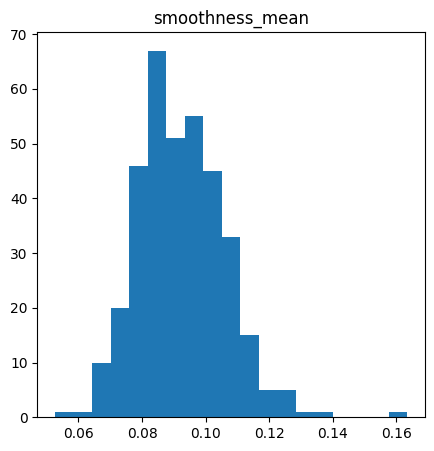

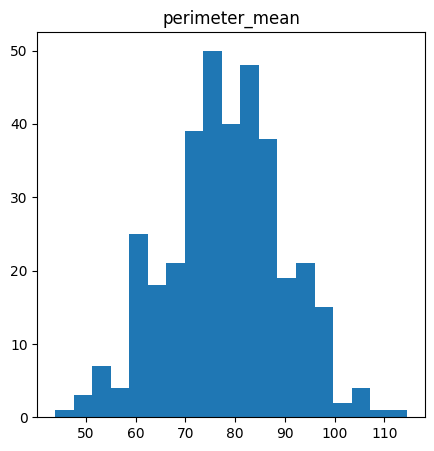

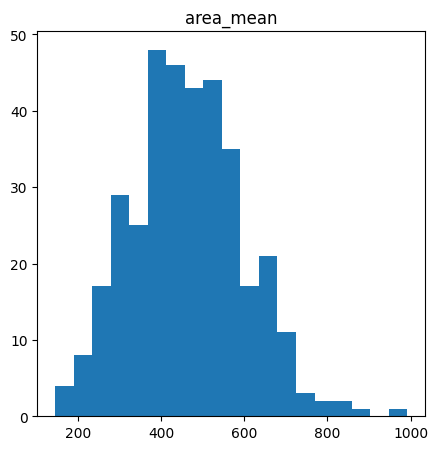

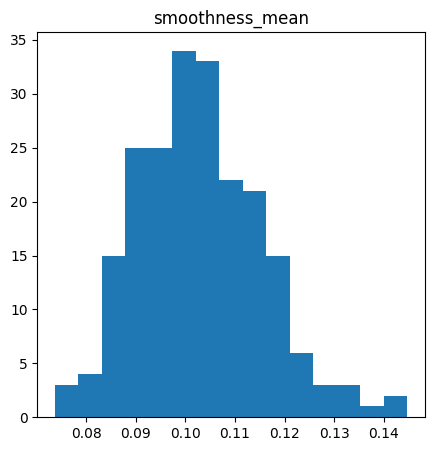

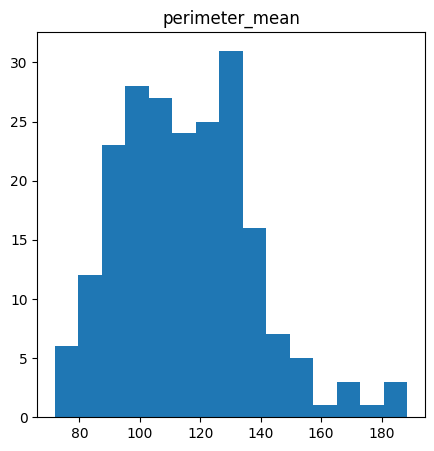

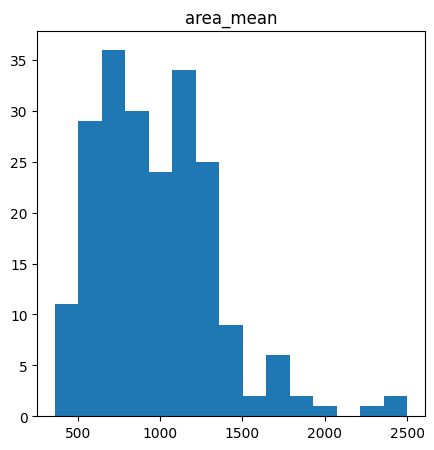

In [ ]:
# column names
column_names = bcd.columns.values
print(column_names)

# A histogram making function that takes a table and a column, and makes a histogram.
def new_histogram(table, column):
  column_data=table[column]
  fig, ax = plt.subplots(figsize=(5,5))
  #square root of total number of data rounded up is the number of bins in a histogram
  num_bins= math.ceil(math.sqrt(len(column_data)))
  ax.hist(column_data, bins=num_bins)
  #title = f"{table} column"
  ax.set_title(column)
  plt.show()

new_histogram(zero_group, "smoothness_mean")
new_histogram(zero_group, "perimeter_mean")
new_histogram(zero_group, "area_mean")
new_histogram(one_group, "smoothness_mean")
new_histogram(one_group, "perimeter_mean")
new_histogram(one_group, "area_mean")

This is to find which column has a approximately normally distributed data, so x and y will not be labeled. We can see that almost every column is right skewed. However, if smoothness_mean, perimeter_mean, and area_mean had their outliers removed, they will all be approximately bell shaped, thus approximately normal. To remove outliers, we will remove the largest 5 values. Althought, this is not the correct way to remove outliers, but it is necessary to keep the number of data in every column the same to conduct the two T tests properly.


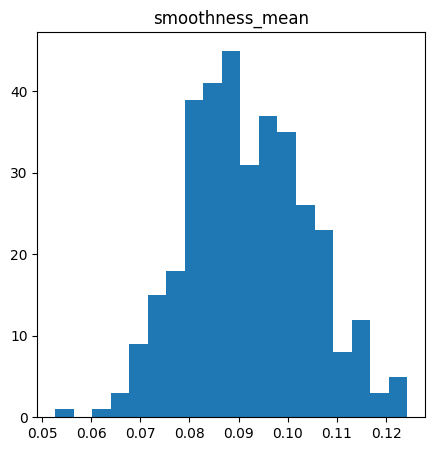

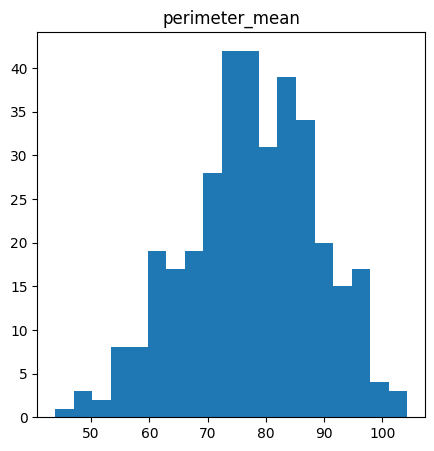

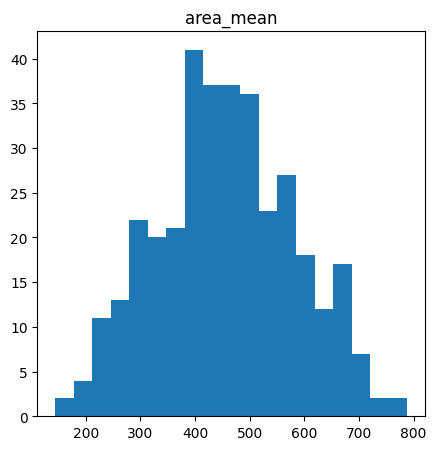

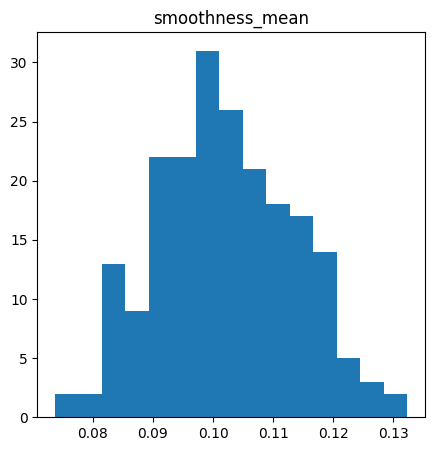

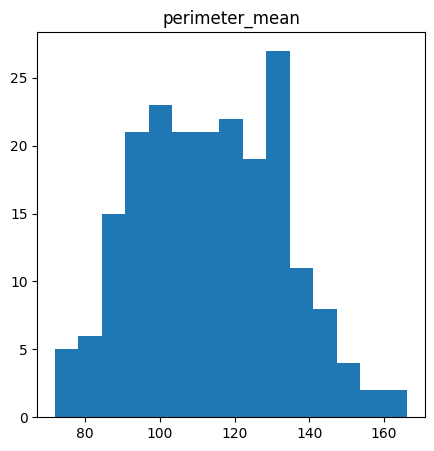

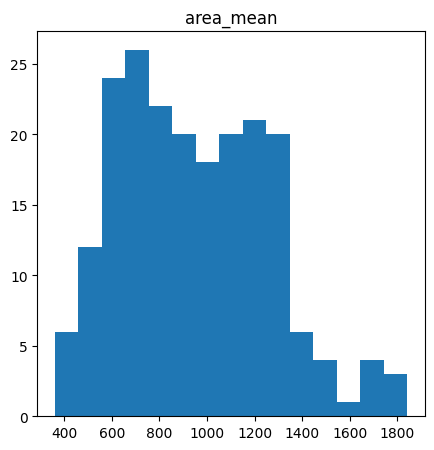

In [ ]:
# a functions that takes a table and sorts it to ascending order, and drops the largest 5 values
def cleaning_tables(table):
  new_table=table[["smoothness_mean","perimeter_mean","area_mean"]]
  # sort from small to large, ascending order
  sorted_table = new_table.apply(lambda x: x.sort_values().values)
  # drop 5 largest values
  sorted_table.drop(sorted_table.tail(5).index, inplace=True)
  return sorted_table

cleaned_one = cleaning_tables(one_group)
cleaned_zero = cleaning_tables(zero_group)

#making histograms for smoothness_mean, perimeter_mean, and area_mean for one group, and zero group
new_histogram(cleaned_zero, "smoothness_mean")
new_histogram(cleaned_zero, "perimeter_mean")
new_histogram(cleaned_zero, "area_mean")
new_histogram(cleaned_one, "smoothness_mean")
new_histogram(cleaned_one, "perimeter_mean")
new_histogram(cleaned_one, "area_mean")

We now see data that is much more normally distributed.

Now the long awaited two sample independent T Test. We will be using SciPy.

Recall:

Alpha =0.05

**Null: There is no difference between the means of symmetry of malignant breast cancer tumors, and the means of symmetry(smoothness mean, perimeter mean, area mean) of benign breast cancer tumors.**

**Alternative: There are differences between the means of symmetry of malignant breast cancer tumors, and the means of symmetry(smoothness mean, perimeter mean, area mean) of benign breast cancer tumors.**

In [ ]:
# using scipy's independent two sample t test on malignant area_mean and benign area_mean
stats.ttest_ind(cleaned_one["area_mean"], cleaned_zero["area_mean"])

TtestResult(statistic=26.04038257500822, pvalue=2.187093303552977e-98, df=557.0)

In [ ]:
# using scipy's independent two sample t test on malignant perimeter_mean and benign perimeter_mean
stats.ttest_ind(cleaned_one["perimeter_mean"], cleaned_zero["perimeter_mean"])

TtestResult(statistic=27.684320706954523, pvalue=9.431629849350694e-107, df=557.0)

In [ ]:
# using scipy's independent two sample t test on malignant smoothness_mean and benign smoothness_mean
stats.ttest_ind(cleaned_one["smoothness_mean"], cleaned_zero["smoothness_mean"])

TtestResult(statistic=9.656524454387823, pvalue=1.675290120699422e-20, df=557.0)

Notice the e-98, e-107, e-20. The test is statistically significant. We have extremely small p value here, we reject the there is no difference between the means of symmetry of malignant breast cancer tumors, and the means of symmetry of benign breast cancer tumors. We have sufficient evidence to support there are differences between the means of symmetry of malignant breast cancer tumors, and the means of symmetry of benign breast cancer tumors.

Perhaps, the e-107 and e-98 means that perimeter_mean, and area_mean is very very different between benign and malignant tumors. Smoothness mean is still very different, but not as different in comparsion. This indicates that all three aspects of symmetry are good indicators of beast tumor malignancy.

# ANOVA


The ANOVA test, just like T Test, is used for the comparison of means between groups. ANOVA allows the comparsion of means between two or more groups, whereas T Test is usually only 2 groups.

Also using alpha = 0.05, this is an attempt of the ANOVA test to see if we will find similar conclusions as our 3 two sample independent T Tests.

Same assumptions of approximately normally distributed, and independent samples. However, the addition of equal standard deviation is not achieved here.

In [ ]:
#groups:
one_sm = cleaned_one["smoothness_mean"]
one_pe = cleaned_one["perimeter_mean"]
one_ar = cleaned_one["area_mean"]
zero_sm = cleaned_zero["smoothness_mean"]
zero_ar = cleaned_zero["area_mean"]
zero_pe = zero_group["perimeter_mean"]
# makes malignant and benigh tables but with only smoothness_mean, perimeter_mean, and area_mean as their columns
one_all = cleaned_one[["smoothness_mean","perimeter_mean","area_mean"]]
zero_all = cleaned_zero[["smoothness_mean","perimeter_mean","area_mean"]]

# f_oneway is the ANOVA test from scipy.stats
f_oneway(one_all, zero_all)

F_onewayResult(statistic=array([ 93.24846454, 766.42161301, 678.10152465]), pvalue=array([1.67529012e-020, 9.43162985e-107, 2.18709330e-098]))

The same result as our T Test, because this is essentially the same thing as doing the  Test three times.

In [ ]:
# A direct ANOVA test of the smoothness mean, area mean, perimeter mean of the one group and zero group
f_oneway(one_sm,one_pe,one_ar,zero_sm,zero_ar,zero_pe)

F_onewayResult(statistic=2133.760496255255, pvalue=0.0)

In [ ]:
# joining the one and zero tables together by appending zero under one, as the order here does not matter
clean_join = cleaned_one.append(cleaned_zero)
join_sm = clean_join["smoothness_mean"]
join_pe = clean_join["perimeter_mean"]
join_ar = clean_join["area_mean"]

# An ANOVA test of joined zero and one group of smoothness mean, perimeter mean, and area mean
f_oneway(join_sm,join_pe,join_ar)

<ipython-input-39-e4567a05d932>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_join = cleaned_one.append(cleaned_zero)


F_onewayResult(statistic=1941.4999092511719, pvalue=0.0)

This ANOVA test result indicates a p value of 0.0 and a test statistic of 2127. We believe this is not a valid result, and ANOVA is not a good fit for statistic test in the case of this project. This directly comparsion of means between 6 groups, 3 ones, 3 zeros, is illogical, as the indepdence is gone, thus the result is nonesense. The case with the joined table, we get similar result of p value = 0.

# Machine Learning (Random Forest)

In [ ]:
#randomly selecting 50% of the data from the main table
bcd_tree_1 = bcd.sample(frac = 0.5)
bcd_tree_1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
503,915143,1,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484
99,862548,1,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390
464,911320502,0,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549
62,858986,1,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292
271,8910748,0,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270


In [ ]:
#splitting train, validation, and test data into 80/10/10
features_train, features_test, labels_train, labels_test = \
  train_test_split(bcd_tree_1.drop(['diagnosis'], axis = 1), bcd_tree_1['diagnosis'], test_size = 0.10)

features_train, features_val, labels_train, labels_val = \
  train_test_split(features_train, labels_train, test_size = (1/9))

In [ ]:
#estimator value is 200
bcdforest1_0 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5)
bcdforest1_0.fit(features_train, labels_train)
#this will tell us the accuracy
print("The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 5 is " + str(bcdforest1_0.score(features_val, labels_val)))
#this will tell us the importance of each column
print(pd.Series(bcdforest1_0.feature_importances_, index = features_train.columns))

#estimator value is 200
bcdforest1_1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 25)
bcdforest1_1.fit(features_train, labels_train)
#this will tell us the accuracy
print("The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 25 is " + str(bcdforest1_1.score(features_val, labels_val)))
#this will tell us the importance of each column
(pd.Series(bcdforest1_1.feature_importances_, index = features_train.columns))

The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 5 is 0.9310344827586207
id                        0.007399
radius_mean               0.196145
texture_mean              0.043310
perimeter_mean            0.177018
area_mean                 0.167728
smoothness_mean           0.013996
compactness_mean          0.052612
concavity_mean            0.121952
concave points_mean       0.198169
symmetry_mean             0.015769
fractal_dimension_mean    0.005901
dtype: float64
The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 25 is 0.896551724137931


id                        0.001439
radius_mean               0.155821
texture_mean              0.036825
perimeter_mean            0.187600
area_mean                 0.150277
smoothness_mean           0.004887
compactness_mean          0.045219
concavity_mean            0.151622
concave points_mean       0.253523
symmetry_mean             0.008550
fractal_dimension_mean    0.004236
dtype: float64

In [ ]:
#estimator value changed to 150
bcdforest1_2 = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 5)
bcdforest1_2.fit(features_train, labels_train)
#this will tell us the accuracy of the first random forest
print("The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 5 is  " + str(bcdforest1_2.score(features_val, labels_val)))
#this will tell us the importance of each column
print(pd.Series(bcdforest1_2.feature_importances_, index = features_train.columns))

#estimator value changed to 150
bcdforest1_3 = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 25)
bcdforest1_3.fit(features_train, labels_train)
#this will tell us the accuracy of the first random forest
print("The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 25 is  " + str(bcdforest1_3.score(features_val, labels_val)))
#this will tell us the importance of each column
print(pd.Series(bcdforest1_3.feature_importances_, index = features_train.columns))

The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 5 is  0.9310344827586207
id                        0.009523
radius_mean               0.135865
texture_mean              0.049762
perimeter_mean            0.186006
area_mean                 0.165864
smoothness_mean           0.012103
compactness_mean          0.058430
concavity_mean            0.155891
concave points_mean       0.204540
symmetry_mean             0.015653
fractal_dimension_mean    0.006363
dtype: float64
The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 25 is  0.896551724137931
id                        0.002523
radius_mean               0.155304
texture_mean              0.036755
perimeter_mean            0.220636
area_mean                 0.163214
smoothness_mean           0.006039
compactness_mean          0.034304
concavity_mean            0.132408
concave points_mean       0.237071
symmetry_mean             0.008299
fracta

In [ ]:
#this uses the actual test data in comparison to the validation data
bcdforest1_4 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5)
bcdforest1_4.fit(features_train, labels_train)

#this will tell us the accuracy of the first random forest
print("The accuracy when we use our test data with the parameters that gave the best accuracy is " + str(bcdforest1_4.score(features_test, labels_test)))

#this will tell us the importance of each column
print(pd.Series(bcdforest1_4.feature_importances_, index = features_train.columns))

The accuracy when we use our test data with the parameters that gave the best accuracy is 0.9310344827586207
id                        0.007672
radius_mean               0.131568
texture_mean              0.040850
perimeter_mean            0.155419
area_mean                 0.168479
smoothness_mean           0.017566
compactness_mean          0.060890
concavity_mean            0.168222
concave points_mean       0.228052
symmetry_mean             0.012479
fractal_dimension_mean    0.008804
dtype: float64


In [ ]:
#creating another table of 50% of rows randomly selected and the 3 features with the most importances
bcd_tree_2 = bcd.sample(frac = 0.5)
bcd_tree_2 = bcd_tree_2[["diagnosis", "smoothness_mean", "area_mean", "perimeter_mean"]]
bcd_tree_2.head()

,diagnosis,smoothness_mean,area_mean,perimeter_mean
231,0,0.06883,395.7,71.76
381,0,0.07987,372.7,70.67
83,1,0.12150,1132.0,129.10
189,0,0.08080,463.7,78.83
333,0,0.08306,390.0,71.38


In [ ]:
#splitting train, validation, and test data into 80/10/10 and making min leaf sample value 5
features_train, features_test, labels_train, labels_test = \
  train_test_split(bcd_tree_2.drop(['diagnosis'], axis = 1), bcd_tree_2['diagnosis'], test_size = 0.10)

features_train, features_val, labels_train, labels_val = \
  train_test_split(features_train, labels_train, test_size = (1/9))

In [ ]:
#estimator value is 200
bcdforest2_0 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5)
bcdforest2_0.fit(features_train, labels_train)
#this will tell us the accuracy
print("The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 5 is " + str(bcdforest2_0.score(features_val, labels_val)))
#this will tell us the importance of each column
print(pd.Series(bcdforest2_0.feature_importances_, index = features_train.columns))

#estimator value is 200
bcdforest2_1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 25)
bcdforest2_1.fit(features_train, labels_train)
#this will tell us the accuracy
print("The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 25 is " + str(bcdforest2_1.score(features_val, labels_val)))
#this will tell us the importance of each column
(pd.Series(bcdforest2_1.feature_importances_, index = features_train.columns))

The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 5 is 0.9310344827586207
smoothness_mean    0.117378
area_mean          0.415128
perimeter_mean     0.467494
dtype: float64
The accuracy when the random forest has an n_estimators size of 200 and min_samples_leaf size of 25 is 0.9655172413793104


smoothness_mean    0.126696
area_mean          0.447621
perimeter_mean     0.425683
dtype: float64

In [ ]:
#estimator value changed to 150
bcdforest2_2 = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 5)
bcdforest2_2.fit(features_train, labels_train)
#this will tell us the accuracy of the first random forest
print("The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 5 is  " + str(bcdforest2_2.score(features_val, labels_val)))
#this will tell us the importance of each column
print(pd.Series(bcdforest2_2.feature_importances_, index = features_train.columns))

#estimator value changed to 150
bcdforest2_3 = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 25)
bcdforest2_3.fit(features_train, labels_train)
#this will tell us the accuracy of the first random forest
print("The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 25 is  " + str(bcdforest2_3.score(features_val, labels_val)))
#this will tell us the importance of each column
print(pd.Series(bcdforest2_3.feature_importances_, index = features_train.columns))

The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 5 is  0.9310344827586207
smoothness_mean    0.113517
area_mean          0.469041
perimeter_mean     0.417443
dtype: float64
The accuracy when the random forest has an n_estimators size of 150 and min_samples_leaf size of 25 is  0.9655172413793104
smoothness_mean    0.096601
area_mean          0.461173
perimeter_mean     0.442226
dtype: float64


In [ ]:
#this uses the actual test data in comparison to the validation data
bcdforest2_4 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 25)
bcdforest2_4.fit(features_train, labels_train)

#this will tell us the accuracy of the first random forest
print("The accuracy when we use our test data with the parameters that gave the best accuracy is " + str(bcdforest2_4.score(features_test, labels_test)))

#this will tell us the importance of each column
print(pd.Series(bcdforest2_4.feature_importances_, index = features_train.columns))

The accuracy when we use our test data with the parameters that gave the best accuracy is 0.8620689655172413
smoothness_mean    0.125525
area_mean          0.462000
perimeter_mean     0.412474
dtype: float64
